In [238]:
import numpy as np
import pandas as pd

In [239]:
data = pd.read_csv("Country-data.csv")
data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [240]:
data = data.drop(['country'], axis=1)

# Standardize the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
data = sc.fit_transform(data)


In [241]:
features = data.T
cov_matrix = np.cov(features)
cov_matrix

array([[ 1.0060241 , -0.32000945, -0.2016093 , -0.12797725, -0.52747354,
         0.29001277, -0.89201752,  0.85358942, -0.485942  ],
       [-0.32000945,  1.0060241 , -0.11509761,  0.74182289,  0.51989676,
        -0.10794074,  0.3182181 , -0.32193832,  0.42124719],
       [-0.2016093 , -0.11509761,  1.0060241 ,  0.09629328,  0.1303592 ,
        -0.2569142 ,  0.21196135, -0.19785877,  0.34804965],
       [-0.12797725,  0.74182289,  0.09629328,  1.0060241 ,  0.12314364,
        -0.2484822 ,  0.05471819, -0.16000656,  0.11619394],
       [-0.52747354,  0.51989676,  0.1303592 ,  0.12314364,  1.0060241 ,
        -0.14864609,  0.61564899, -0.50486319,  0.90096644],
       [ 0.29001277, -0.10794074, -0.2569142 , -0.2484822 , -0.14864609,
         1.0060241 , -0.24114897,  0.31883023, -0.22296618],
       [-0.89201752,  0.3182181 ,  0.21196135,  0.05471819,  0.61564899,
        -0.24114897,  1.0060241 , -0.76545827,  0.60370413],
       [ 0.85358942, -0.32193832, -0.19785877, -0.16000656, -0

In [242]:
values,vectors = np.linalg.eig(cov_matrix)
values

array([4.16057017, 1.55566165, 1.1774338 , 1.00077724, 0.66459866,
       0.224928  , 0.06727787, 0.08884738, 0.1141221 ])

In [243]:
# Sort the eigenvalues in descending order

sorted_idx = eigenvalues.argsort()[::-1]
sorted_eigenvalues = eigenvalues[sorted_idx]
sorted_eigenvectors = eigenvectors[:, sorted_idx]

In [244]:
# Calculate the explained variance
total = sum(sorted_eigenvalues)
explained_variance = [(i / total) for i in sorted_eigenvalues]
explained_variance

[0.4595173978609591,
 0.17181625651618201,
 0.1300425889695308,
 0.11053161805571908,
 0.0734021142415604,
 0.024842346764277504,
 0.012604303981650255,
 0.009812817379261438,
 0.00743055623085952]

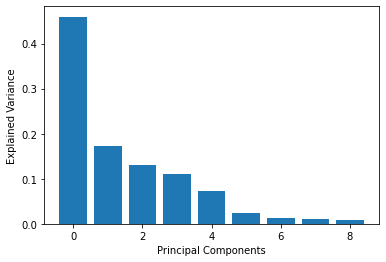

In [245]:
# Plot the explained variance:

import matplotlib.pyplot as plt
plt.bar(range(len(explained_variance)), explained_variance)
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')
plt.show()

In [246]:

# Choose the number of principal components
pc = 3

# Transform the data into the new coordinate system
W = sorted_eigenvectors[:, :pc]
X_pca = data.dot(W)
X_pca


array([[ 2.91302459e+00, -9.56205755e-02,  7.18118495e-01],
       [-4.29911330e-01,  5.88155666e-01,  3.33485505e-01],
       [ 2.85225077e-01,  4.55174413e-01, -1.22150481e+00],
       [ 2.93242265e+00, -1.69555507e+00, -1.52504374e+00],
       [-1.03357587e+00, -1.36658709e-01,  2.25720917e-01],
       [-2.24072616e-02,  1.77918658e+00, -8.69997116e-01],
       [ 1.01583737e-01,  5.68251724e-01, -2.42091816e-01],
       [-2.34216461e+00,  1.98845915e+00, -1.90344188e-01],
       [-2.97376366e+00,  7.34688659e-01,  5.19766356e-01],
       [ 1.81486997e-01,  4.02865873e-01, -8.67458743e-01],
       [-1.26874386e+00,  6.56588363e-01,  4.88097616e-01],
       [-1.67099640e+00, -5.61162493e-01, -9.91258303e-01],
       [ 1.12385093e+00,  9.61397405e-01, -5.26614801e-01],
       [-1.08137420e+00,  4.81969530e-01,  6.64355198e-01],
       [-5.80025152e-01, -5.35326834e-01, -4.86227511e-01],
       [-3.14378596e+00, -6.63547921e-01,  6.45228094e-01],
       [-2.11255447e-01, -6.99242662e-01

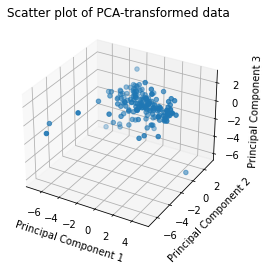

In [247]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2])
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.title('Scatter plot of PCA-transformed data')
plt.show()




C:\Users\SWETHA\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


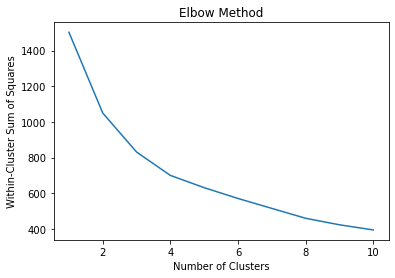

In [248]:
# finding the number of clusters for kmeans by elbow method - 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Calculate the within-cluster sum of squares for different values of k
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

# Plot the within-cluster sum of squares for different values of k
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares')
plt.show()


# the number of clusters needed are 3 from the graph shown below.

In [249]:

# Define the k-means function
def kmeans(X, k, max_iterations=100):
    # Initialize the centroids randomly
    centroids = X[np.random.choice(X.shape[0], k, replace=False), :]
    
    # Iterate until convergence or max_iterations is reached
    for i in range(max_iterations):
        # Calculate the distance between each point and each centroid
        distances = np.sqrt(np.sum((X - centroids[:, np.newaxis])**2, axis=2))
        
        # Assign each point to the closest centroid
        labels = np.argmin(distances, axis=0)
        
        # Update the centroids
        for j in range(k):
            centroids[j, :] = np.mean(X[labels == j, :], axis=0)
    
    return labels, centroids


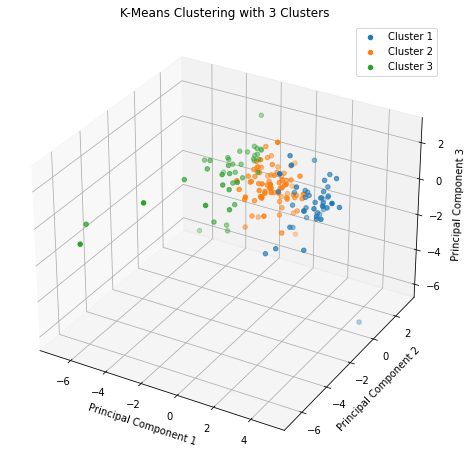

In [250]:
# Choose the number of clusters
k = 3

# Cluster the data using k-means
labels, centroids = kmeans(X_pca, k)

# Visualize the clusters
import matplotlib.pyplot as plt

# Plot the first three principal components with different colors for each cluster


fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(projection='3d')

for i in range(k):
    ax.scatter(X_pca[labels == i, 0], X_pca[labels == i, 1], X_pca[labels == i, 2], label=f'Cluster {i+1}')

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title(f'K-Means Clustering with {k} Clusters')
ax.legend()
plt.show()


In [265]:
data = data = pd.read_csv("Country-data.csv")
data['cluster'] = labels
data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,1
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,1
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,1
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,0


In [252]:
# group the dataframe by label column
groups = data.groupby('cluster')

# iterate over groups and print countries in each group
for cluster, groups in groups:
    print(f"Countries in Group {cluster}:")
    print(groups['country'].values)

Countries in Group 0:
['Afghanistan' 'Angola' 'Benin' 'Burkina Faso' 'Burundi' 'Cameroon'
 'Central African Republic' 'Chad' 'Comoros' 'Congo, Dem. Rep.'
 'Congo, Rep.' "Cote d'Ivoire" 'Equatorial Guinea' 'Eritrea' 'Gabon'
 'Gambia' 'Ghana' 'Guinea' 'Guinea-Bissau' 'Haiti' 'Kenya' 'Kiribati'
 'Lao' 'Lesotho' 'Liberia' 'Madagascar' 'Malawi' 'Mali' 'Mauritania'
 'Mozambique' 'Myanmar' 'Namibia' 'Niger' 'Nigeria' 'Pakistan' 'Rwanda'
 'Senegal' 'Sierra Leone' 'Sudan' 'Tajikistan' 'Tanzania' 'Timor-Leste'
 'Togo' 'Uganda' 'Yemen' 'Zambia']
Countries in Group 1:
['Albania' 'Algeria' 'Antigua and Barbuda' 'Argentina' 'Armenia'
 'Azerbaijan' 'Bahamas' 'Bangladesh' 'Barbados' 'Belarus' 'Belize'
 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina' 'Botswana' 'Brazil'
 'Bulgaria' 'Cambodia' 'Cape Verde' 'Chile' 'China' 'Colombia'
 'Costa Rica' 'Croatia' 'Dominican Republic' 'Ecuador' 'Egypt'
 'El Salvador' 'Fiji' 'Georgia' 'Grenada' 'Guatemala' 'Guyana' 'India'
 'Indonesia' 'Iran' 'Iraq' 'Jamaica' 'Jorda

         child_mort   exports   health   imports       income  inflation  \
cluster                                                                    
0          94.41087  27.68520  6.14261  42.06665   3328.76087   12.01293   
1          22.86625  38.42725  6.37988  45.63125  11978.00000    8.01620   
2           5.33902  61.40244  8.42122  54.75854  42726.82927    2.57744   

         life_expec  total_fer         gdpp  
cluster                                      
0          59.55652    5.02761   1607.56522  
1          72.33750    2.36438   6271.20000  
2          79.41951    1.75341  38765.12195  


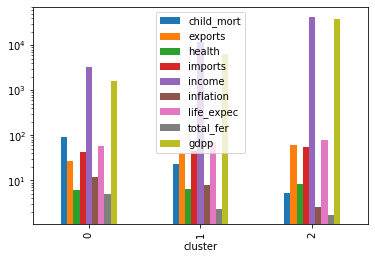

In [253]:
# visualise final cluster Mean
K_cluster_mean = data.groupby(by = 'cluster').mean()

print(round(K_cluster_mean[['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']],5))
K_cluster_mean[['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']].plot.bar()
plt.yscale('log')
plt.show()

In [266]:
# final labels
data['cluster_labels'] = data['cluster'].map({0: 'Undeveloped', 1:'Developing', 2: 'Developed'})
data                                                    

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster,cluster_labels
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0,Undeveloped
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1,Developing
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1,Developing
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0,Undeveloped
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1,Developing
...,...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,1,Developing
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,1,Developing
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,1,Developing
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,0,Undeveloped


In [267]:
KMean_cluster_Undeveloped = data[data['cluster_labels'] == 'Undeveloped']
KMean_cluster_Undeveloped

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster,cluster_labels
0,Afghanistan,90.2,10.000,7.58,44.9000,1610,9.440,56.2,5.82,553,0,Undeveloped
3,Angola,119.0,62.300,2.85,42.9000,5900,22.400,60.1,6.16,3530,0,Undeveloped
17,Benin,111.0,23.800,4.10,37.2000,1820,0.885,61.8,5.36,758,0,Undeveloped
25,Burkina Faso,116.0,19.200,6.74,29.6000,1430,6.810,57.9,5.87,575,0,Undeveloped
26,Burundi,93.6,8.920,11.60,39.2000,764,12.300,57.7,6.26,231,0,Undeveloped
28,Cameroon,108.0,22.200,5.13,27.0000,2660,1.910,57.3,5.11,1310,0,Undeveloped
31,Central African Republic,149.0,11.800,3.98,26.5000,888,2.010,47.5,5.21,446,0,Undeveloped
32,Chad,150.0,36.800,4.53,43.5000,1930,6.390,56.5,6.59,897,0,Undeveloped
36,Comoros,88.2,16.500,4.51,51.7000,1410,3.870,65.9,4.75,769,0,Undeveloped
37,"Congo, Dem. Rep.",116.0,41.100,7.91,49.6000,609,20.800,57.5,6.54,334,0,Undeveloped


In [268]:
# sort based on 'child_mort','income','gdpp' in respective order
Top_5 = KMean_cluster_Undeveloped.sort_values(by = ['gdpp','income','child_mort'],
                                                     ascending=[True, True, False]).head(5)
Top_5 = Top_5[['country','gdpp','income','child_mort']]
Top_5

,country,gdpp,income,child_mort
26,Burundi,231,764,93.6
88,Liberia,327,700,89.3
37,"Congo, Dem. Rep.",334,609,116.0
112,Niger,348,814,123.0
132,Sierra Leone,399,1220,160.0


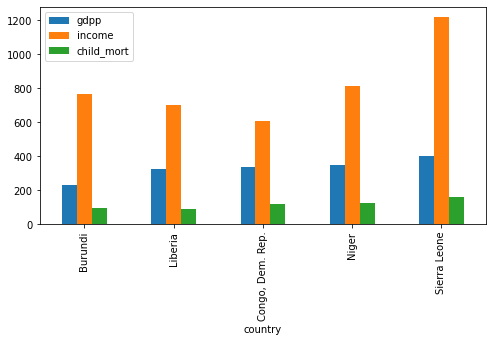

In [269]:
# plot for final top5 countries based on child_mort, gdpp and income
plotdata = Top_5.set_index('country')
plotdata.plot.bar(figsize = (8,4))
plt.show()

In [270]:
KMean_cluster_Developed = data[data['cluster_labels'] == 'Developed']
KMean_cluster_Developed

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster,cluster_labels
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,2,Developed
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,2,Developed
11,Bahrain,8.6,69.5,4.97,50.9,41100,7.440,76.0,2.16,20700,2,Developed
15,Belgium,4.5,76.4,10.70,74.7,41100,1.880,80.0,1.86,44400,2,Developed
23,Brunei,10.5,67.4,2.84,28.0,80600,16.700,77.1,1.84,35300,2,Developed
29,Canada,5.6,29.1,11.30,31.0,40700,2.870,81.3,1.63,47400,2,Developed
42,Cyprus,3.6,50.2,5.97,57.5,33900,2.010,79.9,1.42,30800,2,Developed
43,Czech Republic,3.4,66.0,7.88,62.9,28300,-1.430,77.5,1.51,19800,2,Developed
44,Denmark,4.1,50.5,11.40,43.6,44000,3.220,79.5,1.87,58000,2,Developed
51,Estonia,4.5,75.1,6.03,68.7,22700,1.740,76.0,1.72,14600,2,Developed


In [271]:
# sort based on 'child_mort','income','gdpp' in respective order
Top_5 = KMean_cluster_Developed.sort_values(by = ['gdpp','income','child_mort'],
                                                     ascending=[True, True, False]).head(5)
Top_5 = Top_5[['country','gdpp','income','child_mort']]
Top_5

,country,gdpp,income,child_mort
95,Malaysia,9070,21100,7.9
131,Seychelles,10800,20400,14.4
90,Lithuania,12000,21100,6.1
67,Hungary,13100,22300,6.0
51,Estonia,14600,22700,4.5


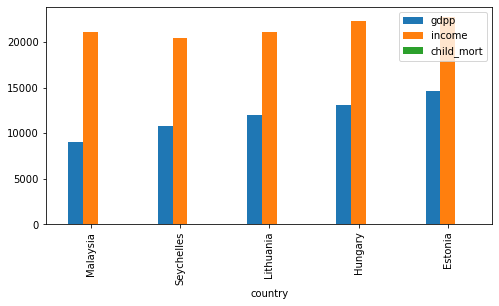

In [272]:
# plot for final top5 countries based on child_mort, gdpp and income
plotdata = Top_5.set_index('country')
plotdata.plot.bar(figsize = (8,4))
plt.show()

In [273]:
KMean_cluster_Developing = data[data['cluster_labels'] == 'Developing']
KMean_cluster_Developing

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster,cluster_labels
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1,Developing
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1,Developing
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1,Developing
5,Argentina,14.5,18.9,8.10,16.0,18700,20.90,75.8,2.37,10300,1,Developing
6,Armenia,18.1,20.8,4.40,45.3,6700,7.77,73.3,1.69,3220,1,Developing
...,...,...,...,...,...,...,...,...,...,...,...,...
160,Uruguay,10.6,26.3,8.35,25.4,17100,4.91,76.4,2.08,11900,1,Developing
161,Uzbekistan,36.3,31.7,5.81,28.5,4240,16.50,68.8,2.34,1380,1,Developing
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,1,Developing
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,1,Developing


In [274]:
# sort based on 'child_mort','income','gdpp' in respective order
Top_5 = KMean_cluster_Developing.sort_values(by = ['gdpp','income','child_mort'],
                                                     ascending=[True, True, False]).head(5)
Top_5 = Top_5[['country','gdpp','income','child_mort']]
Top_5

,country,gdpp,income,child_mort
109,Nepal,592,1990,47.0
12,Bangladesh,758,2440,49.4
27,Cambodia,786,2520,44.4
83,Kyrgyz Republic,880,2790,29.6
136,Solomon Islands,1290,1780,28.1


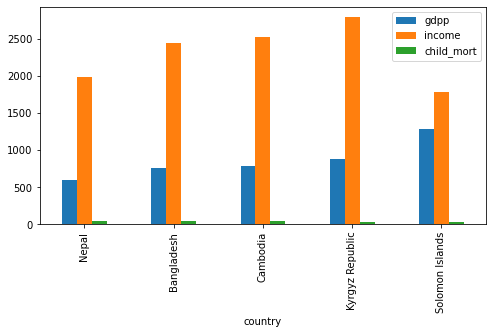

In [275]:
# plot for final top5 countries based on child_mort, gdpp and income
plotdata = Top_5.set_index('country')
plotdata.plot.bar(figsize = (8,4))
plt.show()